# An Occupancy Problem
![Mathematical Explanation](./ch2_occupancy_001.png)

In [9]:
using Plots
pyplot(fmt=:png,size=(800,600))

Plots.PyPlotBackend()

In [10]:
occupancyAnalytic(n,r) =  sum(
    [(-1)^k*binomial(n,k)*(1 - k/n)^r for k in 0:n])

occupancyAnalytic (generic function with 1 method)

In [11]:
function occupancyMC(n,r,N)
    fullCount = 0
    for _ in 1:N
        envelopes = zeros(Int,n)
        for k in 1:r
            target = rand(1:n)
            envelopes[target] += 1
        end
        numFilled = sum(envelopes .> 0)
        if numFilled == n
            fullCount += 1
        end
    end
    return fullCount/N
end

occupancyMC (generic function with 1 method)

In [25]:
max_n, N, Kvals = 100, 10^3, [2,3,4]

(100, 1000, [2, 3, 4])

In [26]:
analytic = [[occupancyAnalytic(big(n),big(k*n)) for n in 1:max_n]
            for k in Kvals]

3-element Array{Array{BigFloat,1},1}:
 [1.0, 0.875, 0.7407407407407407407407407407407407407407407407407407407407407407407407407407507, 0.6229248046875, 0.5225471999999999999999999999999999999999999999999999999999999999999999999999951, 0.4378156806211790208132229165608223678639773747226879371369540551067757286321699, 0.3665749237277169623553713297448685748139906688148201513501706581631966528255032, 0.30679788173756605829112231731414794921875, 0.2566975664075897743720600625259512738119349301793832033205371817029714338983751, 0.2147373231974006400000000000000000000000000000000000000000000000000000000001176  …  1.069657334526848513060724413172337700899371866204013344464186587033996001303631e-07, 8.941398126513886825738219454513648957514481632012323087638438017198550960585833e-08, 7.474224150732878615287973980617874647757151383973183924654413320436969764181841e-08, 6.24779443278709531559446203760038434553284555234278644256711434180745164111931e-08, 5.2226061526848121582031958416321831104276

In [27]:
monteCarlo = [[occupancyMC(n,k*n,N) for n in 1:max_n]
            for k in Kvals]

3-element Array{Array{Float64,1},1}:
 [1.0, 0.872, 0.707, 0.612, 0.55, 0.452, 0.379, 0.297, 0.273, 0.224  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                    
 [1.0, 0.965, 0.929, 0.87, 0.815, 0.796, 0.751, 0.705, 0.673, 0.635  …  0.006, 0.005, 0.007, 0.007, 0.005, 0.005, 0.004, 0.006, 0.006, 0.002]
 [1.0, 0.992, 0.982, 0.976, 0.947, 0.918, 0.912, 0.886, 0.89, 0.863  …  0.175, 0.172, 0.178, 0.166, 0.191, 0.163, 0.168, 0.157, 0.167, 0.164]

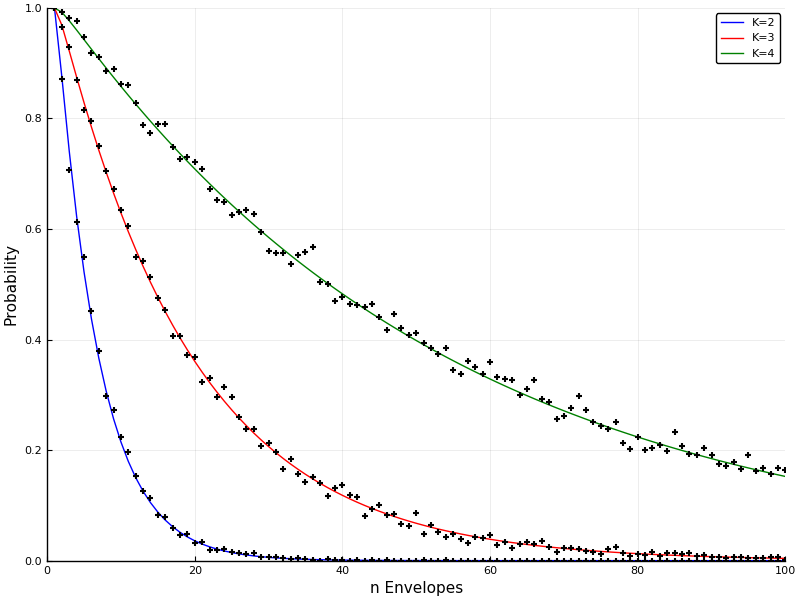

In [28]:
plot(1:max_n, analytic, c=[:blue :red :green],
    label=["K=2" "K=3" "K=4"])
scatter!(1:max_n, monteCarlo, mc=:black, shape=:+,
    label="", xlims=(0,max_n),ylims=(0,1),
    xlabel="n Envelopes", ylabel="Probability", legend=:topright)